## 1.4 Write a program to evaluate the efficacy of human-guided control point selection for image alignment



In [ ]:
import cv2
import numpy as np

def select_control_points(image):
    # Display the image and let the user select control points
    points = []
    window_name = "Select Control Points"
    cv2.namedWindow(window_name)
    cv2.imshow(window_name, image)

    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            points.append((x, y))
            cv2.circle(image, (x, y), 3, (0, 255, 0), -1)
            cv2.imshow(window_name, image)

    cv2.setMouseCallback(window_name, click_event)

    # Wait for the user to select control points
    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # Press 'Esc' to exit
            break
        elif key == 13:  # Press 'Enter' to finish selecting points
            break

    cv2.destroyAllWindows()
    return np.array(points)

def align_images(image1, image2, control_points):
    # Estimate the transformation matrix using control points
    matrix, _ = cv2.findHomography(control_points[:, :2], control_points[:, 2:])

    # Apply the transformation to image2
    aligned_image = cv2.warpPerspective(image2, matrix, (image1.shape[1], image1.shape[0]))

    return aligned_image

def evaluate_alignment(image1, aligned_image):
    # Compute the mean squared error between the two images
    mse = np.sum((image1 - aligned_image) ** 2) / float(image1.size)
    print(f"Mean Squared Error: {mse}")

if __name__ == "__main__":
    # Load two images
    image1 = cv2.imread("/home/elonmusk/Pictures/alone.jpg")
    image2 = cv2.imread("/home/elonmusk/Pictures/abhay.jpg")

    # Select control points in both images
    control_points = []
    print("Select control points in the first image:")
    control_points += select_control_points(image1)
    print("Select corresponding control points in the second image:")
    control_points += select_control_points(image2)

    # Reshape control points into a 2x4 array
    control_points = control_points.reshape((2, 4))

    # Perform image alignment
    aligned_image = align_images(image1, image2, control_points)

    # Evaluate the alignment
    evaluate_alignment(image1, aligned_image)

    # Display the original and aligned images
    cv2.imshow("Original Image 1", image1)
    cv2.imshow("Original Image 2", image2)
    cv2.imshow("Aligned Image 2", aligned_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


## EXPERIMENT NO-1.3
 

## AIM: Write a program to analyze the impact of refining feature detection for image segmentation.



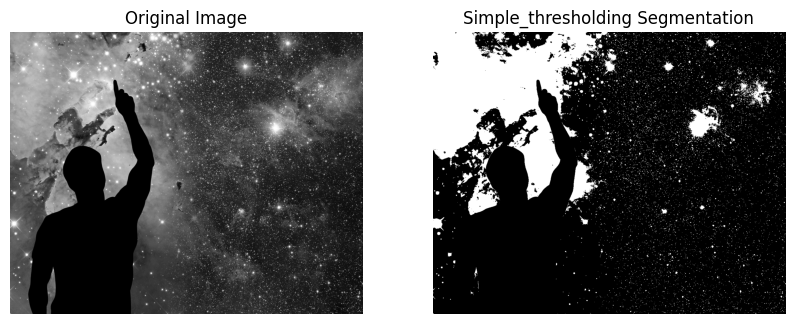

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image(image, method="simple_thresholding", **kwargs):
    if method == "simple_thresholding":
        # Simple thresholding
        _, segmented_image = cv2.threshold(image, **kwargs)

    elif method == "adaptive_thresholding":
        # Adaptive thresholding
        segmented_image = cv2.adaptiveThreshold(image, **kwargs)

    elif method == "canny_edge_detection":
        # Canny edge detection
        segmented_image = cv2.Canny(image, **kwargs)

    else:
        raise ValueError("Invalid segmentation method")

    return segmented_image

def display_images(original, segmented, title_original="Original Image", title_segmented="Segmented Image"):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title(title_original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap="gray")
    plt.title(title_segmented)
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    # Load an example image
    image = cv2.imread("/home/elonmusk/Pictures/alone.jpg", cv2.IMREAD_GRAYSCALE)

    # Choose a feature detection method and its parameters
    segmentation_method = "simple_thresholding"
    segmentation_params = {
        "thresh": 128,
        "maxval": 255,
        "type": cv2.THRESH_BINARY
    }

    # Apply feature detection and segmentation
    segmented_image = segment_image(image, method=segmentation_method, **segmentation_params)

    # Display the original and segmented images
    display_images(image, segmented_image, title_segmented=f"{segmentation_method.capitalize()} Segmentation")

    # Optionally, experiment with different parameters or methods and compare results
    # Example:
    # segmentation_params = {"blockSize": 11, "C": 2}
    # segmentation_method = "adaptive_thresholding"
    # segmented_image = segment_image(image, method=segmentation_method, **segmentation_params)
    # display_images(image, segmented_image, title_segmented=f"{segmentation_method.capitalize()} Segmentation")


## EXPERIMENT NO-1.2
 

## AIM- Write a program to assess various feature matching algorithms for object recognition.

In [ ]:
import cv2
import numpy as np

def detect_and_match_features(img1, img2):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Create BFMatcher (Brute Force Matcher) object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors using the BFMatcher
    matches = bf.match(des1, des2)

    # Sort them based on their distances
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matches
    cv2.imshow("Feature Matches", img_matches)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Load two example images
    img1 = cv2.imread("/home/elonmusk/Pictures/alone.jpg", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread("/home/elonmusk/Pictures/abhay.jpg", cv2.IMREAD_GRAYSCALE)

    # Perform feature detection and matching
    detect_and_match_features(img1, img2)


## EXPERIMENT NO-1.1

## AIM: Write a program to implement various feature extraction techniques for image classification.



In [1]:
pip install scikit-image scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 134.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 689.1 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 958.3 kB/s eta 0:00:0036m0:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 1.5 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 789.8 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 1.1 MB/s eta 0:00:002.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

def extract_hog_features(images):
    hog_features = []
    hog = cv2.HOGDescriptor()

    for image in images:
        # Resize image to a fixed size if needed
        resized_image = cv2.resize(image, (64, 128))
        # Calculate HOG features
        features = hog.compute(resized_image)
        hog_features.append(features.flatten())

    return np.array(hog_features)

if __name__ == "__main__":
    # Load example images for two classes (e.g., cats and dogs)
    cats_images = ["/home/elonmusk/Pictures/alone.jpg", "/home/elonmusk/Pictures/abhay.jpg"]  # List of cat images
    dogs_images = ["/home/elonmusk/Pictures/nasa.jpg", "/home/elonmusk/Pictures/abhayFormalpick.jpeg"]  # List of dog images

    # Labeling: 0 for cats, 1 for dogs
    labels_cats = np.zeros(len(cats_images))
    labels_dogs = np.ones(len(dogs_images))

    # Combine images and labels
    images = np.concatenate([cats_images, dogs_images], axis=0)
    labels = np.concatenate([labels_cats, labels_dogs], axis=0)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Extract HOG features
    X_train_hog = extract_hog_features(X_train)
    X_test_hog = extract_hog_features(X_test)

    # Train a Support Vector Machine (SVM) classifier
    clf = svm.SVC()
    clf.fit(X_train_hog, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_hog)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # You can now use this trained classifier for image classification
    # For example, to predict the class of a new image:
    # new_image = cv2.imread("new_image.jpg")
    # new_image_hog = extract_hog_features([new_image])
    # prediction = clf.predict(new_image_hog)
    # print(f"Prediction: {prediction}")


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [2]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
    image_paths = ["/home/elonmusk/Pictures/alone.jpg", "/home/elonmusk/Pictures/abhay.jpg", "/home/elonmusk/Pictures/nasa.jpg", "/home/elonmusk/Pictures/abhayFormalpick.jpeg"]
